In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("after_collecting_data.csv")
df = df.drop(["Unnamed: 0"], axis=1)

In [3]:
df

,inn,n_requests,documents_len,result_type_proigrano,result_type_viygrano,result_type_ne_udalos_opredelit,num_of_active_cases,case_side_type_0,case_side_type_1,case_side_type_2,proigrano_sum,viygrano_sum,cases_len,is_bankrupt,year,long_term_liabilities_fiscal_year,short_term_liabilities_fiscal_year,balance_assets_fiscal_year,okei
0,7736609147,1,253,23,6,23,1,2,57,0,51153662.45,10395854.55,59,1,2012.0,0.0,75255.0,85541.0,384.0
1,5028024427,1,99,1,0,1,1,1,1,0,4269304.88,0.00,4,1,2013.0,0.0,59825.0,48360.0,384.0
2,7622005092,1,0,0,0,0,0,0,0,0,0.00,0.00,0,0,NaN,NaN,NaN,NaN,NaN
3,7455005950,1,76,1,2,2,1,1,5,0,7779.05,808000.00,6,1,2013.0,38411.0,4198.0,45890.0,384.0
4,2111000271,1,150,1,2,9,0,3,10,0,2439854.48,2439854.48,13,1,2012.0,0.0,0.0,6122.0,384.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,5406339932,1,375,25,0,37,0,6,63,0,34568136.72,0.00,69,1,2012.0,2791.0,289333.0,287226.0,384.0
189,7701038326,1,3,1,0,0,0,0,1,0,50000.00,0.00,1,0,2012.0,0.0,0.0,12528.0,384.0
190,5045021088,1,41,2,1,3,0,0,6,0,67447.33,0.00,6,0,2012.0,0.0,0.0,1597.0,384.0
191,5009033730,1,4870,4,21,32,4,9,49,5,794277.24,64052835.29,86,0,2012.0,1992651.0,830163.0,3884450.0,384.0


### feature distributions / распр-ия признаков

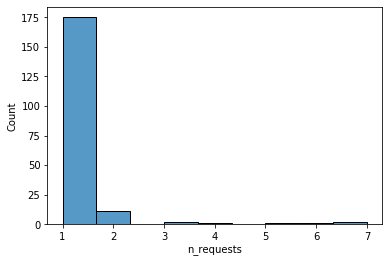

In [50]:
sns.histplot(df["n_requests"])
plt.show()

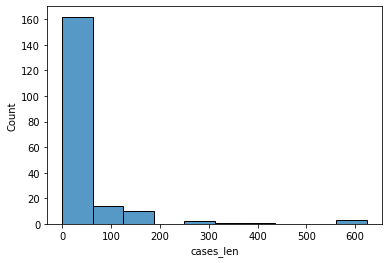

In [53]:
sns.histplot(df["cases_len"], bins=10)
plt.show()

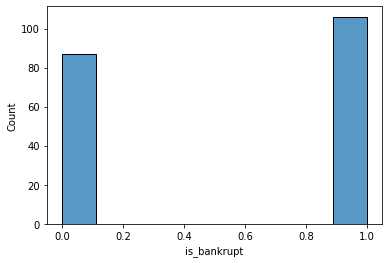

In [54]:
sns.histplot(df["is_bankrupt"])
plt.show()

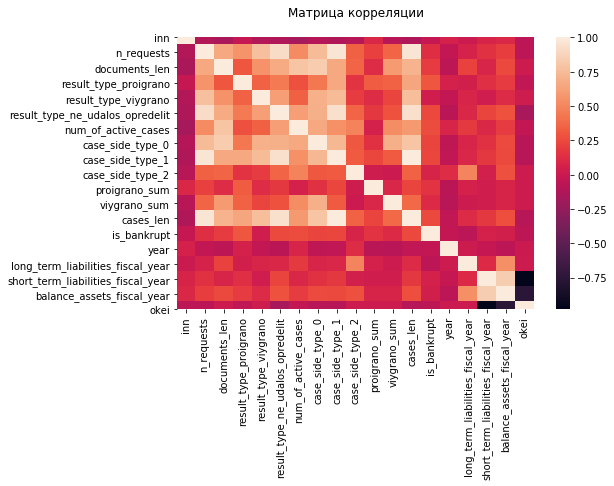

In [4]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corrmat)
plt.title("Матрица корреляции\n")
plt.show()

In [ ]:
# на матрице сверху мы видим, что okei очень сильно коррелирует (>0.75 по модулю) с short_term_liabilities_fiscal_year и 
# long_term_liabilities_fiscal_year -> удалим okei

#### Посмотрим на коэф. корреляции (но нужно удалить строки с NaN, они помешают)

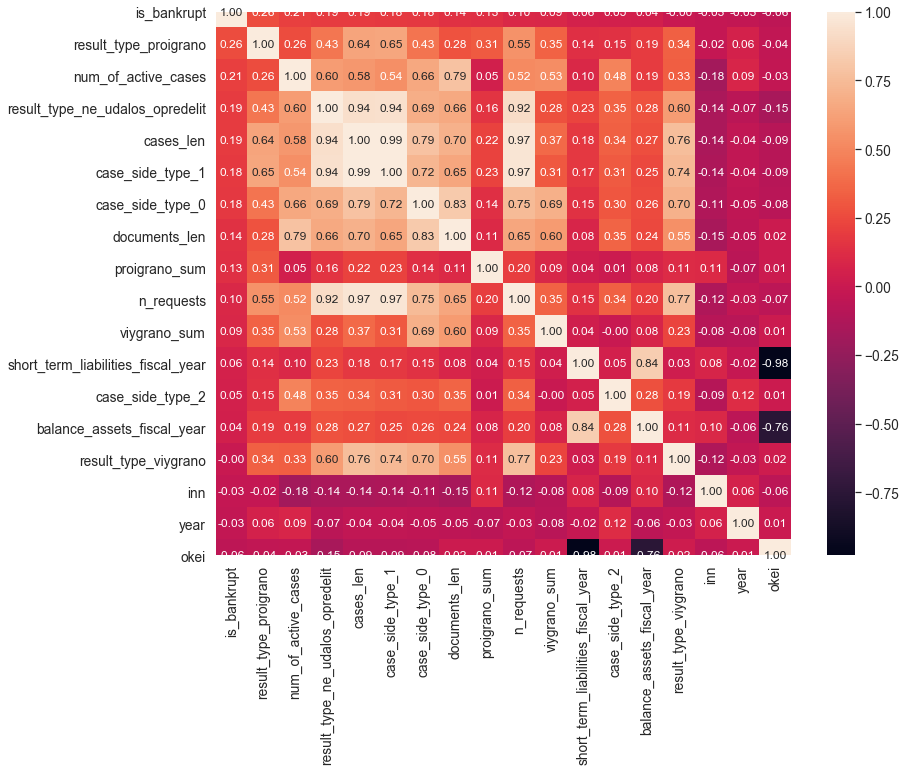

In [28]:
corrmat = df.dropna().corr()
k = 18 
cols = corrmat.nlargest(k, 'is_bankrupt')['is_bankrupt'].index
cm = np.corrcoef(df.dropna()[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(13, 10))
hm = sns.heatmap(cm, cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 12}, 
                 yticklabels=cols.values, 
                 xticklabels=cols.values)
plt.show()

In [29]:
# целевая переменная is_bankrupt сильнее всего коррелирует с признаком result_type_proigrano (видимо, чем
# больше дел проиграла компания, тем выше риск стать банкротом, что логично); на втором месте по влиянию 
# на банкротство -- переменная num_of_active_cases (кол-во активных дел): чем больше разбирательств, которые еще
# не закрыты, тем выше риск стать банкротом

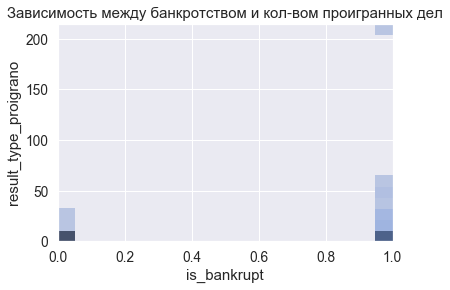

In [59]:
sns.histplot(y=df["result_type_proigrano"], x = df["is_bankrupt"], bins=20)
plt.title("Зависимость между банкротством и кол-вом проигранных дел")
plt.show()

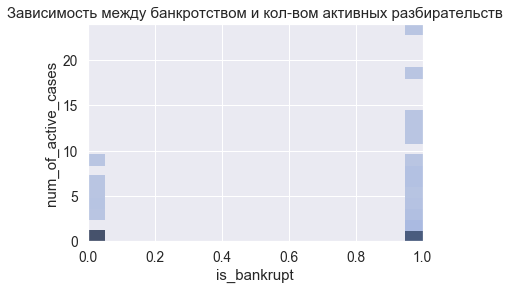

In [60]:
sns.histplot(y=df["num_of_active_cases"], x = df["is_bankrupt"], bins=20)
plt.title("Зависимость между банкротством и кол-вом активных разбирательств")
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


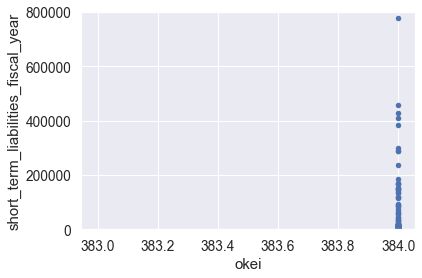

In [38]:
# 'ложная корреляция'
var = 'okei'
data = pd.concat([df['short_term_liabilities_fiscal_year'], df[var]], axis=1)
data.plot.scatter(x=var, y='short_term_liabilities_fiscal_year', ylim=(0,800000));

In [42]:
df["okei"].value_counts()

384.0    165
383.0      1
Name: okei, dtype: int64

In [30]:
# удалим признак okei, тк он не особо репрезентативен тут

In [63]:
df = df.drop(["okei"], axis=1)

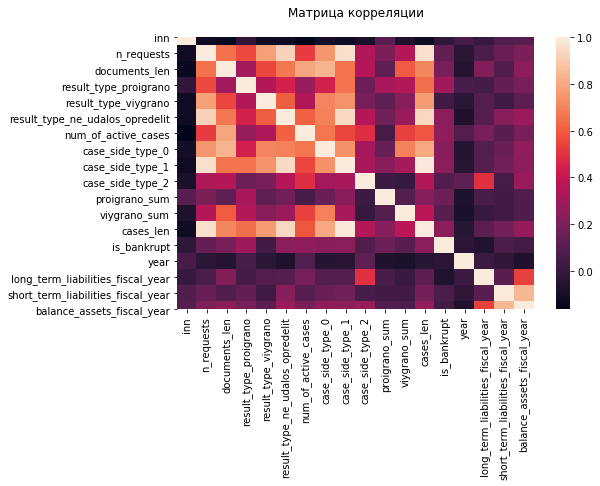

In [64]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corrmat)
plt.title("Матрица корреляции\n")
plt.show()

In [31]:
# тут мы видим, что нет никакой корреляции у inn с другими признакми, что логично, это ведь индекс,
# также обратим внимание, что с удалением okei, у нас из отрицательных корреляций остался year,слабо (<0.2 по модулю)
# коррелирующий почти со всеми признаками

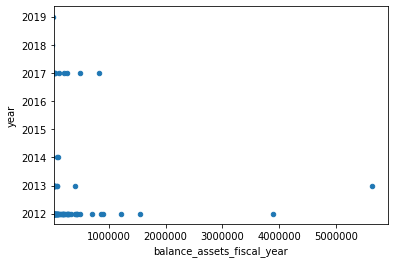

In [47]:
# есть 'хорошая' корреляция с 2012 годом, видимо, много данных от этого года
var = 'balance_assets_fiscal_year'
data = pd.concat([df['year'], df[var]], axis=1)
data.plot.scatter(x=var, y='year', xlim=(30000));

#### Мы не можем с большой уверенностью утверждать, что выводы и корреляции, полученные выше абсолютно верны из-за того, что мало данных. Если данных будет больше (в раз 10 минимум), то можно будет с определенной долей уверенностью (который можно посчитать через t-критерий, например, если выборки будут нормально распределены) сказать, что тот признак имеет корреляцию с тем признаком (возможно, какая-то корреляция усилится или ослабеет)

In [65]:
df.to_csv("df_after_eda.csv")